# L2: Image captioning app 🖼️📝

Now, we're going to build an image captioning app using an open-source image-to-text model. So we'll set up our API key again, and then we'll also set up our helper function. 

Load your HF API key and relevant Python libraries

In [ ]:
import os
import io
import IPython.display
from PIL import Image
import base64 
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [ ]:
# Helper functions
import requests, json

#Image-to-text endpoint
def get_completion(inputs, parameters=None, ENDPOINT_URL=os.environ['HF_API_ITT_BASE']): 
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL,
                                headers=headers,
                                data=json.dumps(data))
    return json.loads(response.content.decode("utf-8"))

In here, we have an image-to-text endpoint, which is an endpoint for the Salesforce Blip image captioning model.  

Basically it is a model that receives an image as an input and outputs the caption of said image. 

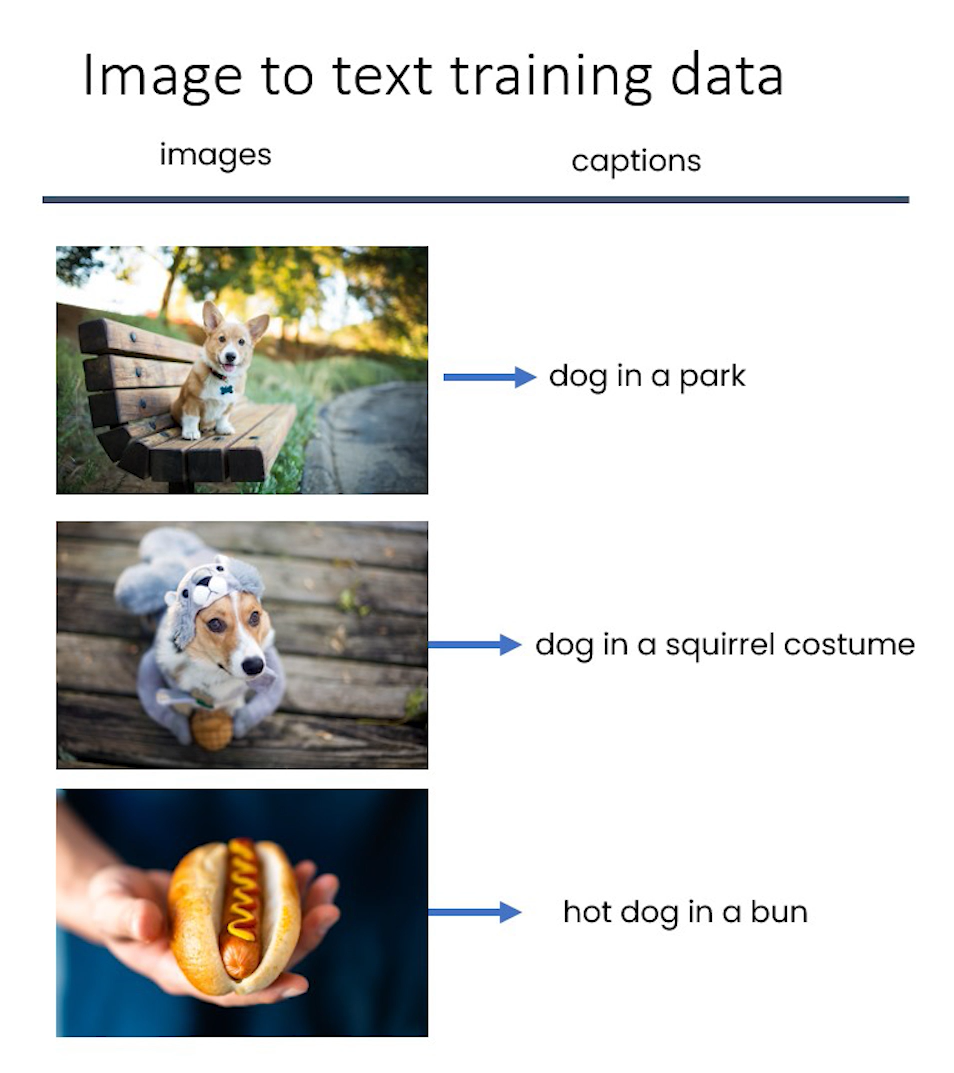

This was a model trained on a pipeline of image and its respective captions. So you can imagine there is a data set that has like for example a photo of a dog in the park and then the caption saying a dog in a park. And the way this works is that this model is trained on millions of those images and text caption pairs in a way that they learn with the objective of predicting what is the caption if it sees a new image. 

## Building an image captioning app 

Here we'll be using an [Inference Endpoint](https://huggingface.co/inference-endpoints) for `Salesforce/blip-image-captioning-base` a 14M parameter captioning model.

The code would look very similar if you were running it locally instead of from an API. You can check the [Pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines) documentation page.

```py
from transformers import pipeline

get_completion = pipeline("image-to-text",model="Salesforce/blip-image-captioning-base")

def summarize(input):
    output = get_completion(input)
    return output[0]['generated_text']
    
```

The free images are available on: https://free-images.com/

In [ ]:
image_url = "https://free-images.com/sm/9596/dog_animal_greyhound_983023.jpg"
display(IPython.display.Image(url=image_url))
get_completion(image_url)

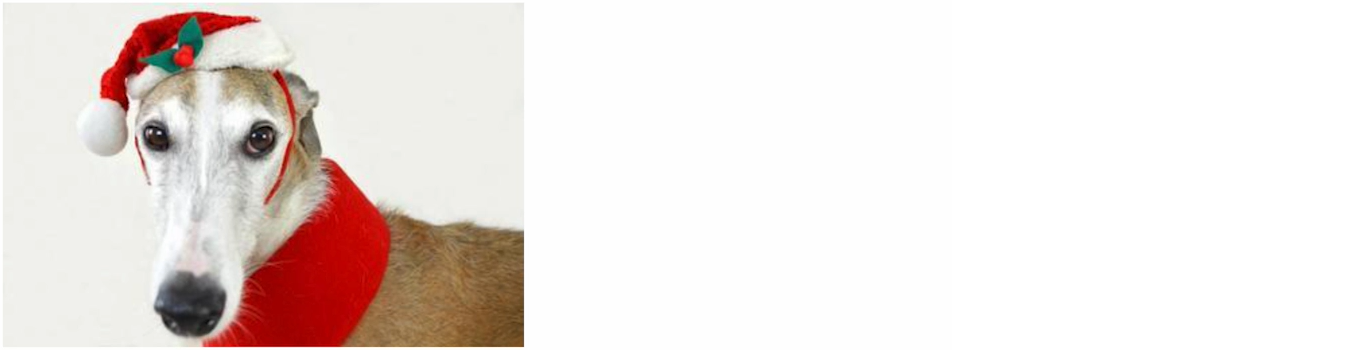

Okay, so let's test out our function. We're using a URL of a free image. You can see it displayed here. And yes, we can see that we took this image and the captioning generated, there is a dog wearing a Santa hat and a scarf. Sounds pretty good. 

## Captioning with `gr.Interface()`

Let's show you how you can build a Gradle interface to build this image captioning app. 

We'll start by importing Gradio. And here we'll have two functions, our captioner function that essentially will take an image and we'll run our get Completion function and we'll return the generated text. And in this particular example, we also have a helper function called "image_to_base64", which basically converts our image into this Base64 format, which is the format required for API.  If you're running the model locally, you don't have to worry about that. But since we're running it in the API format, we need to convert it to Base64 and back to be able to run this properly. 

So here, in the same way that we had in our previous lesson. We have the exact same structure. So we have inputs, outputs, a title, a description, and some examples. 

In [ ]:
import gradio as gr 

def image_to_base64_str(pil_image):
    byte_arr = io.BytesIO()
    pil_image.save(byte_arr, format='PNG')
    byte_arr = byte_arr.getvalue()
    return str(base64.b64encode(byte_arr).decode('utf-8'))

def captioner(image):
    base64_image = image_to_base64_str(image)
    result = get_completion(base64_image)
    return result[0]['generated_text']

gr.close_all()
demo = gr.Interface(fn=captioner,
                    inputs=[gr.Image(label="Upload image", type="pil")],
                    outputs=[gr.Textbox(label="Caption")],
                    title="Image Captioning with BLIP",
                    description="Caption any image using the BLIP model",
                    allow_flagging="never",
                    examples=["christmas_dog.jpeg", "bird_flight.jpeg", "cow.jpeg"])

demo.launch(share=True, server_port=int(os.environ['PORT1']))

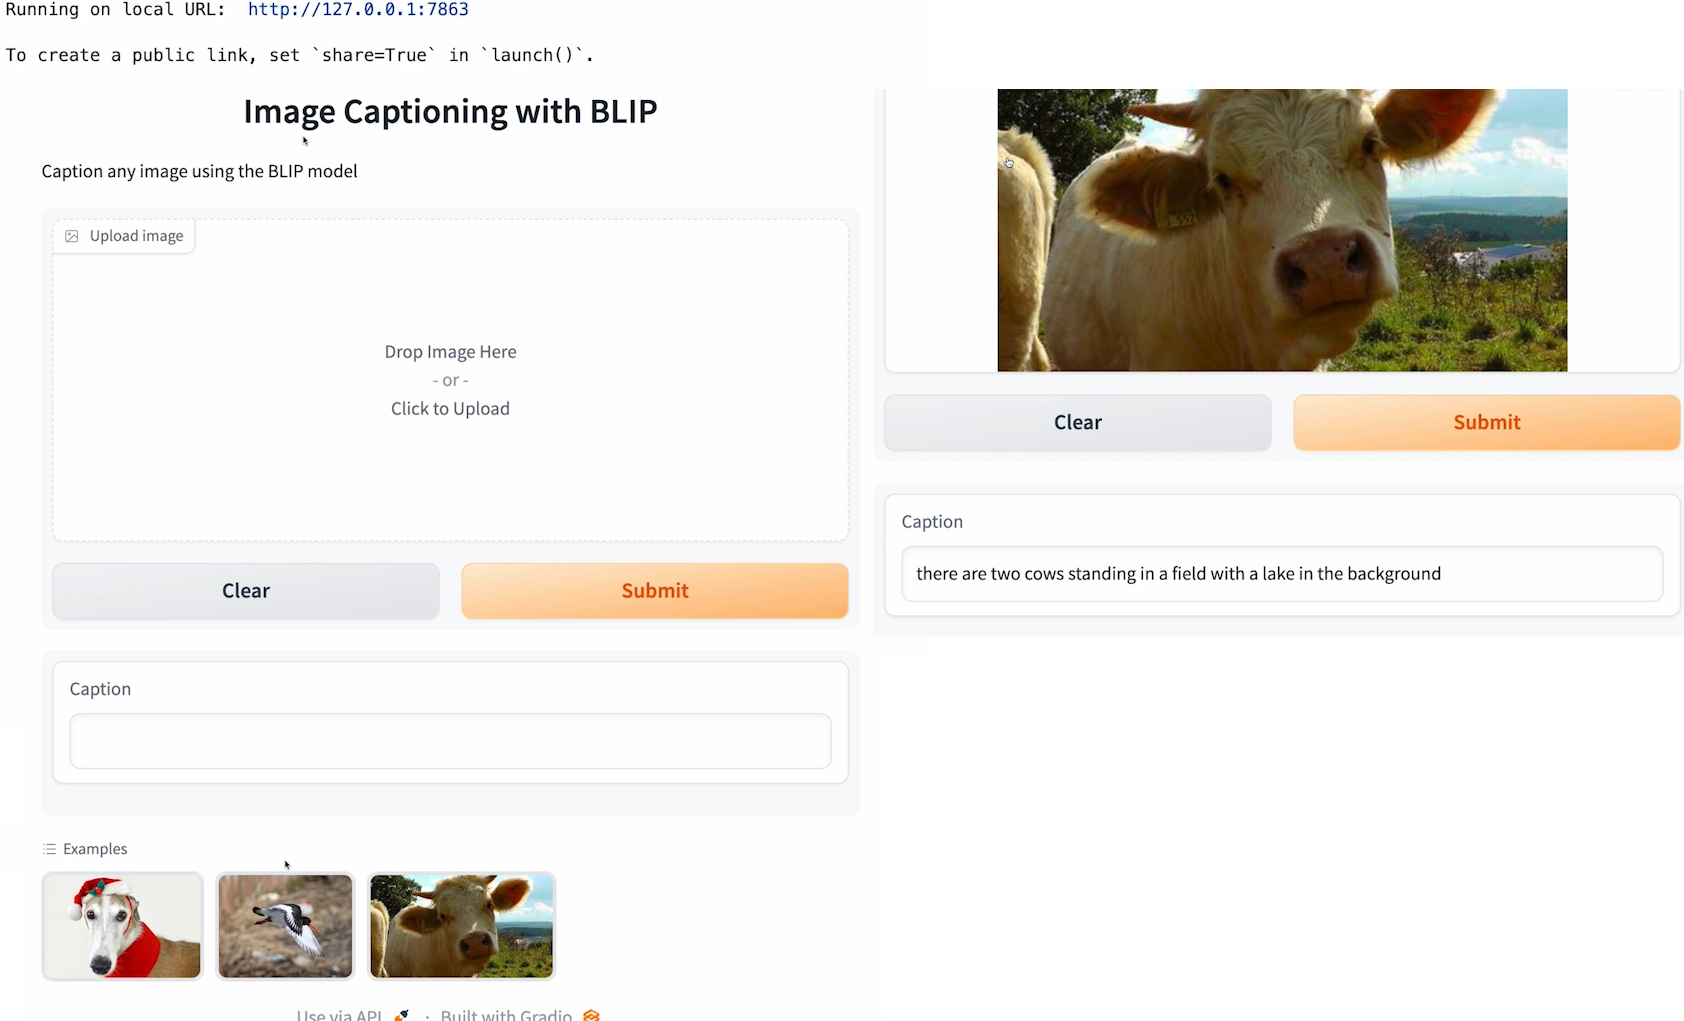

So here we have our image captioning example with BLIP.  We can see the app looks very similar to our previous one, but it has this nice upload image field. And if we go back to the code, we can see that all our fields are the same as in the last lesson, except that in the inputs field, we have this Gradio image, which is a new component that we haven't used before. And when an image component is an input, we can see that it turns into an upload image field. So feel free to upload photos of your pets or maybe your kids and see how it describes, maybe something cute that you have around you. You can maybe like take a picture right now if you'd like and send and put it here, or you can just go through the examples here. For example, let's go back to the dog that we saw before and see if it gives the same caption and it does. How about this bird here, what it would say? There is a bird that is flying in the air, that is true. Here, we have this cow that is mad at you, but we hope it doesn't say that. It doesn't, it says there are two cows also. It even identified this other cow here, like this one-tenth of the cow as a new cow, and it's standing on a field with a lake in the background. So this was pretty complete, even though I'm not completely sure this is a lake, but overall it's done a pretty good job. And now we learned how to build a captioning app. In the next lesson, we're going to learn how to generate new images.

In [ ]:
gr.close_all()